# Portuguese Bank Telemarketing Analytics

Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

### Import Libraries

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline



In [64]:
dataset1 = pd.read_csv(r'/Users/Abhishek/Desktop/bank-full.csv')

In [65]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA

In [66]:
dataset1.shape

(45211, 17)

In [67]:
dataset1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

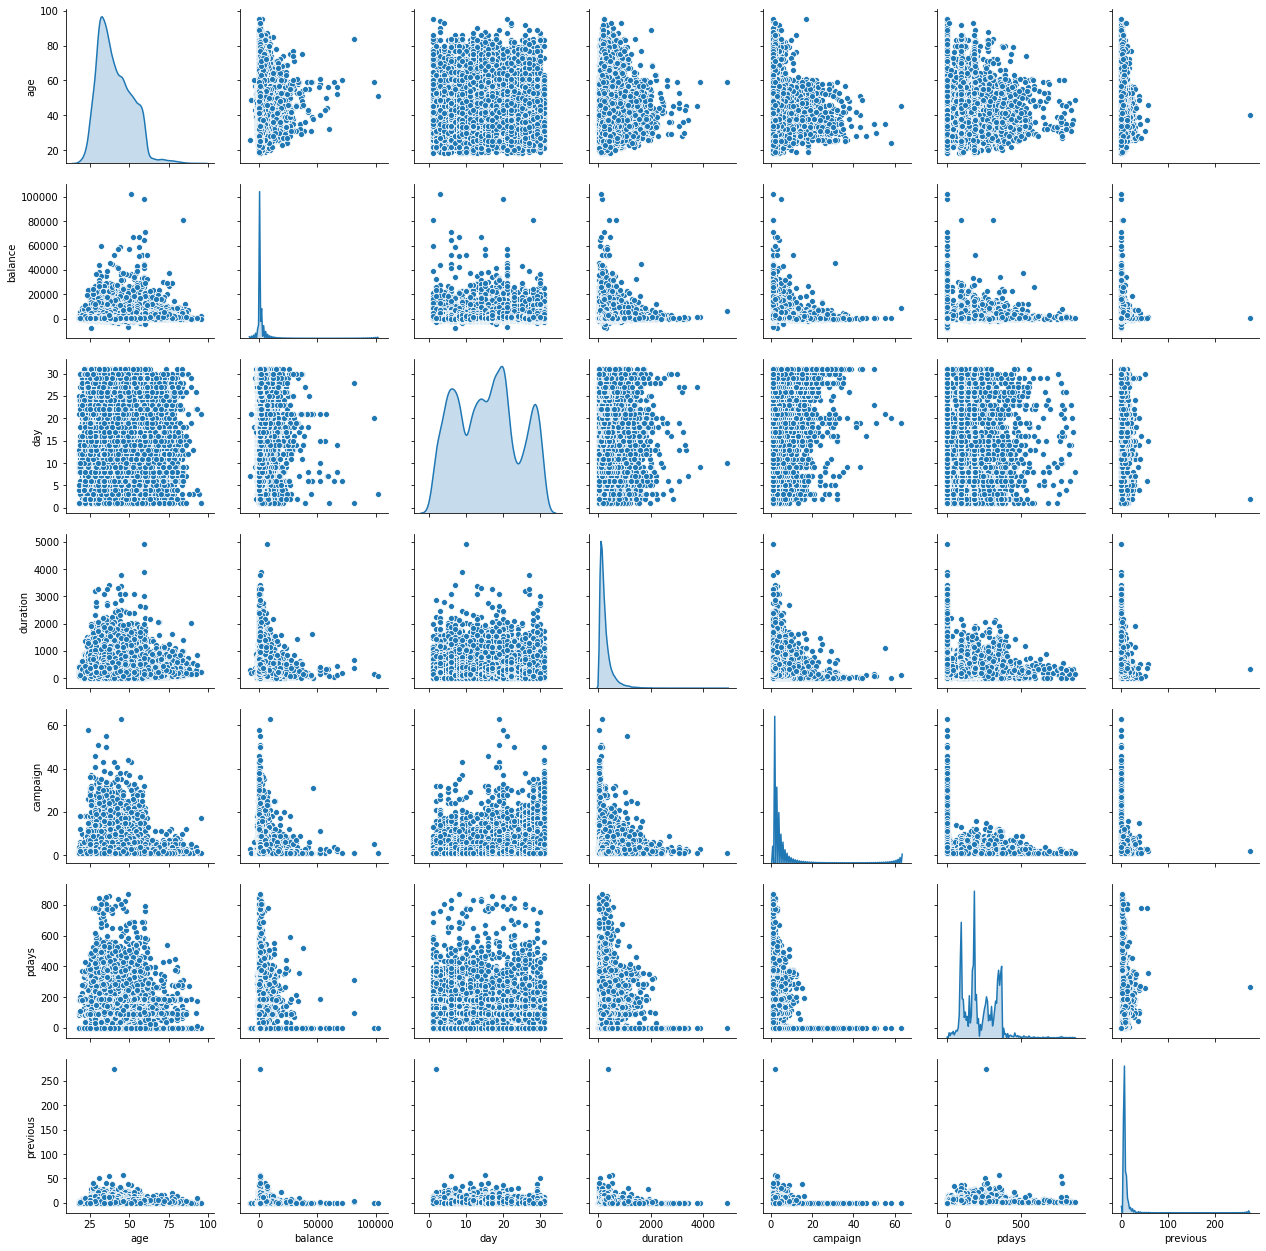

In [12]:
sns.pairplot(dataset1,diag_kind='kde')

### Checking for missing values

In [13]:
dataset1['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
36    1806
30    1757
37    1696
39    1487
38    1466
40    1355
41    1291
42    1242
45    1216
29    1185
46    1175
43    1161
44    1136
47    1088
28    1038
48     997
49     994
50     939
51     936
52     911
27     909
53     891
57     828
54     811
55     806
      ... 
67      54
71      54
72      52
20      50
77      44
73      44
69      44
75      39
74      37
68      36
19      35
76      32
80      31
78      30
79      25
83      22
82      19
81      17
18      12
84       9
86       9
85       5
87       4
89       3
88       2
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [14]:
dataset1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [15]:
dataset1['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
dataset1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [17]:
dataset1['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [18]:
dataset1['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
 5         113
 6          88
 8          81
 23         75
 10         69
 7          69
 11         65
 25         63
 20         62
 19         60
 15         59
 47         59
 21         59
 49         59
 33         58
 13         57
 53         56
 16         56
 24         55
 79         55
 91         54
 145        54
 46         54
 9          54
 14         53
          ... 
 6205        1
 6320        1
 4394        1
 2327        1
 4404        1
 8460        1
 29312       1
 4362        1
-2049        1
 17332       1
 2633        1
 6571        1
 1338        1
-568         1
 8402        1
 8863        1
 10451       1
 29184       1
 13242       1
 4586        1
 51439       1
 4092        1
-472         1
 8652        1
 4554        1
 4305        1
 6352        1
 18881       1
 14889       1
 7218        1
Name: balance, Length: 7168, dtype: int64

In [19]:
dataset1['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [20]:
dataset1['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [21]:
dataset1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [22]:
dataset1['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [23]:
dataset1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [24]:
dataset1['duration'].value_counts()

124     188
90      184
89      177
122     175
104     175
114     175
136     174
112     174
139     174
121     173
91      170
119     170
88      170
103     169
92      168
123     168
97      168
111     166
73      166
85      166
113     166
81      166
125     165
82      165
108     165
106     165
80      164
87      163
101     163
126     163
       ... 
1255      1
3366      1
1319      1
1298      1
1650      1
2485      1
947       1
2453      1
2389      1
1971      1
1875      1
1491      1
1395      1
1331      1
934       1
1107      1
1158      1
1254      1
1778      1
1286      1
1318      1
1478      1
1606      1
1702      1
2770      1
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [25]:
dataset1['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [26]:
dataset1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [27]:
dataset1['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [28]:
dataset1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [29]:
dataset1['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [30]:
dataset1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#### There are no missing values in the dataset and also no missing data like '?' or etc. But 'poutcome','contact','education','job' have values called 'unkown'.

In [31]:
dataset1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### Checking outliers

Outliers in Age

In [39]:
dataset1['age_outliers'] = dataset1['age']
dataset1['age_outliers']= zscore(dataset1['age_outliers'])

condition1 = (dataset1['age_outliers']>3) | (dataset1['age_outliers']<-3 )
age_outliers = dataset1[condition1]

In [41]:
age_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_outliers
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no,3.961314
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no,3.207923
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,unknown,no,3.207923
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,unknown,no,3.961314
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes,3.207923


In [48]:
age_outliers['age'].count()

381

Outliers in balance

In [42]:
dataset1['balance_outliers'] = dataset1['balance']
dataset1['balance_outliers']= zscore(dataset1['balance_outliers'])

condition1 = (dataset1['balance_outliers']>3) | (dataset1['balance_outliers']<-3 )
balance_outliers = dataset1[condition1]

In [43]:
balance_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_outliers,balance_outliers
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no,0.947747,3.045499
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no,-0.559037,3.567055
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,no,0.382703,7.631452
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,-0.182341,14.413658
920,44,admin,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no,0.288529,18.780545


In [45]:
balance_outliers['balance'].count()

745

Outliers in day

In [49]:
dataset1['day_outliers'] = dataset1['day']
dataset1['day_outliers']= zscore(dataset1['day_outliers'])

condition1 = (dataset1['day_outliers']>3) | (dataset1['day_outliers']<-3 )
day_outliers = dataset1[condition1]

In [50]:
day_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_outliers,balance_outliers,day_outliers


Outliers in duration

In [51]:
dataset1['duration_outliers'] = dataset1['duration']
dataset1['duration_outliers']= zscore(dataset1['duration_outliers'])

condition1 = (dataset1['duration_outliers']>3) | (dataset1['duration_outliers']<-3 )
duration_outliers = dataset1[condition1]

In [52]:
duration_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,Target,age_outliers,balance_outliers,day_outliers,duration_outliers
37,53,technician,married,secondary,no,-3,no,no,unknown,5,...,1666,1,-1,0,unknown,no,1.136095,-0.448405,-1.298476,5.466798
43,54,retired,married,secondary,no,529,yes,no,unknown,5,...,1492,1,-1,0,unknown,no,1.230269,-0.273677,-1.298476,4.791135
59,46,services,married,primary,no,179,yes,no,unknown,5,...,1778,1,-1,0,unknown,no,0.476877,-0.388629,-1.298476,5.901707
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,...,1042,1,-1,0,unknown,yes,1.701139,0.322106,-1.298476,3.043732
86,56,admin,married,secondary,no,45,no,no,unknown,5,...,1467,1,-1,0,unknown,yes,1.418617,-0.432640,-1.298476,4.694057


In [53]:
duration_outliers['duration'].count()

963

Outliers in Campaign

In [54]:
dataset1['campaign_outliers'] = dataset1['campaign']
dataset1['campaign_outliers']= zscore(dataset1['campaign_outliers'])

condition1 = (dataset1['campaign_outliers']>3) | (dataset1['campaign_outliers']<-3 )
campaign_outliers = dataset1[condition1]

In [55]:
campaign_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,Target,age_outliers,balance_outliers,day_outliers,duration_outliers,campaign_outliers
2626,31,technician,married,secondary,no,106,yes,no,unknown,13,...,13,-1,0,unknown,no,-0.935732,-0.412605,-0.337213,-0.610283,3.304133
2706,46,admin,divorced,tertiary,no,3749,yes,no,unknown,13,...,19,-1,0,unknown,no,0.476877,0.783888,-0.337213,-0.734543,5.240875
2967,37,technician,married,tertiary,yes,0,yes,no,unknown,14,...,14,-1,0,unknown,no,-0.370689,-0.447419,-0.217055,-0.641348,3.626923
3044,51,unemployed,married,secondary,no,425,yes,no,unknown,14,...,14,-1,0,unknown,no,0.947747,-0.307834,-0.217055,0.108094,3.626923
3079,28,blue-collar,married,primary,no,0,no,no,unknown,14,...,24,-1,0,unknown,no,-1.218254,-0.447419,-0.217055,-0.936465,6.854826


In [56]:
campaign_outliers['campaign'].count()

840

Outliers in pdays

In [57]:
dataset1['pdays_outliers'] = dataset1['pdays']
dataset1['pdays_outliers']= zscore(dataset1['pdays_outliers'])

condition1 = (dataset1['pdays_outliers']>3) | (dataset1['pdays_outliers']<-3 )
pdays_outliers = dataset1[condition1]

In [58]:
pdays_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,Target,age_outliers,balance_outliers,day_outliers,duration_outliers,campaign_outliers,pdays_outliers
32111,32,services,married,secondary,no,1129,yes,no,cellular,15,...,341,2,failure,yes,-0.841558,-0.076615,-0.096898,2.503978,-0.246560,3.004187
32147,41,blue-collar,married,secondary,no,217,yes,no,cellular,15,...,344,1,failure,no,0.006007,-0.376149,-0.096898,0.453692,-0.246560,3.034149
32230,33,management,single,secondary,no,-665,yes,yes,cellular,16,...,342,1,failure,no,-0.747384,-0.665829,0.023260,0.255653,-0.569351,3.014174
32234,31,technician,single,tertiary,no,2530,yes,no,cellular,16,...,342,1,failure,no,-0.935732,0.383524,0.023260,-0.769491,-0.569351,3.014174
32252,30,management,single,tertiary,no,726,yes,no,cellular,16,...,342,3,failure,no,-1.029906,-0.208975,0.023260,-0.851036,-0.569351,3.014174


In [59]:
pdays_outliers['pdays'].count()

1723

Outliers in previous

In [60]:
dataset1['previous_outliers'] = dataset1['previous']
dataset1['previous_outliers']= zscore(dataset1['previous_outliers'])

condition1 = (dataset1['previous_outliers']>3) | (dataset1['previous_outliers']<-3 )
previous_outliers = dataset1[condition1]

In [61]:
previous_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,Target,age_outliers,balance_outliers,day_outliers,duration_outliers,campaign_outliers,pdays_outliers,previous_outliers
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,...,11,other,no,-0.653211,0.133913,-1.178318,-0.901517,-0.569351,0.607247,4.523577
24295,35,technician,divorced,tertiary,no,1718,yes,yes,cellular,17,...,16,other,no,-0.559037,0.116834,0.143418,-0.715127,-0.569351,1.266405,6.694266
24331,36,management,married,tertiary,no,5057,yes,no,cellular,17,...,10,failure,no,-0.464863,1.213482,0.143418,-0.730660,-0.569351,1.256418,4.089439
24506,42,unemployed,married,unknown,no,970,yes,no,telephone,17,...,10,success,no,0.100181,-0.128836,0.143418,1.812783,-0.569351,0.787017,4.089439
24556,44,management,married,tertiary,no,1451,yes,no,cellular,17,...,12,failure,no,0.288529,0.029141,0.143418,-0.392828,0.076230,1.096622,4.957714


In [62]:
previous_outliers['previous'].count()

582

### Preparing data for model

In [106]:
#  Delete the rows which column 'poutcome' contains 'other'
condition = (dataset1.poutcome == 'other') | (dataset1.poutcome == 'unkown')
dataset2 = dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)

#Fill 'unknown' in job and education to 'other'
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

In [107]:
dataset2.shape

(43371, 17)

In [108]:
# deleting outliers in balance column

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [109]:
dataset3.shape

(42655, 18)

In [110]:
dataset4 = dataset3.drop('balance_outliers', axis=1)


In [111]:
#change object columns to int
for feature in dataset4.columns:
    if dataset4[feature].dtype == "object":
        dataset4[feature] = pd.Categorical(dataset4[feature]).codes

In [112]:
dataset4.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
Target        int8
dtype: object

In [113]:
#  Drop column "contact" which is useless
dataset5 = dataset4.drop('contact', axis=1)

In [115]:
# Change the unit of 'duration' from seconds to minutes
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)

In [117]:
# Drop rows that 'duration' < 5s as these calls doesnt give any insight
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)

In [118]:
# Drop customer values with 'other' education
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [119]:
dataset7.shape

(42598, 16)

In [120]:
dataset7.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,3,0,2143,1,0,5,8,4.35,1,-1,0,2,0
1,44,10,2,2,0,29,1,0,5,8,2.52,1,-1,0,2,0
2,33,2,1,2,0,2,1,1,5,8,1.27,1,-1,0,2,0
3,47,1,1,0,0,1506,1,0,5,8,1.53,1,-1,0,2,0
4,33,5,2,0,0,1,0,0,5,8,3.30,1,-1,0,2,0


Distribution of Age and Balance

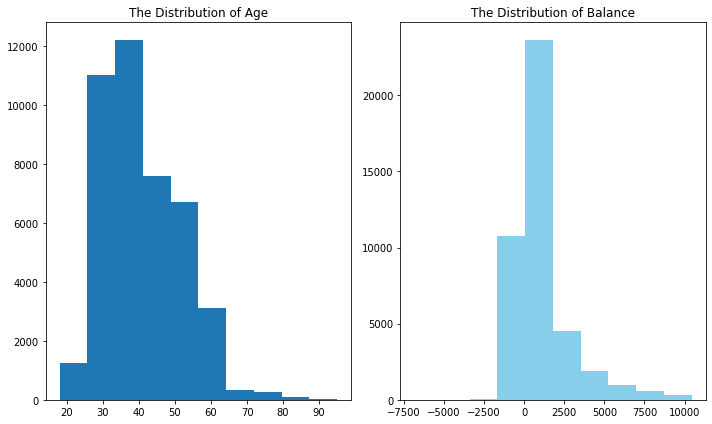

In [122]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

Relationship between 'duration' & 'campaign': 

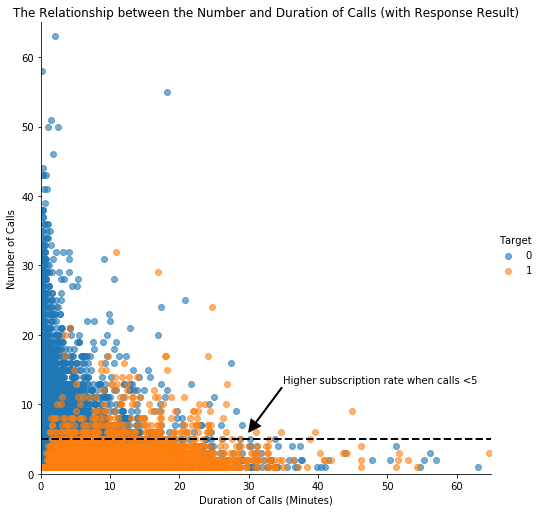

In [124]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,
                     hue = 'Target',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

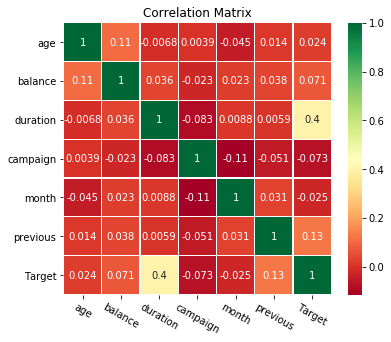

In [125]:
corr_data = dataset7[['age','balance','duration','campaign','month','previous','Target']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


### Building models

In [131]:
array = dataset7.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [132]:
test_size= 0.30
seed = 7
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)


#### Logistic Regression

In [133]:
# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Report               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     11311
         1.0       0.57      0.19      0.29      1469

    accuracy                           0.89     12780
   macro avg       0.74      0.59      0.61     12780
weighted avg       0.87      0.89      0.87     12780

Accuracy 0.8904538341158059


In [134]:
print(metrics.confusion_matrix(y_test,y_pred))

[[11096   215]
 [ 1185   284]]


In [135]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8904538341158059
Precision : 0.1933287950987066
Recall : 0.5691382765531062


#### KNN

In [136]:
k_range = np.arange(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

3 0.8857589984350548


In [137]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

Report               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     11311
         1.0       0.45      0.20      0.27      1469

    accuracy                           0.88     12780
   macro avg       0.67      0.58      0.60     12780
weighted avg       0.85      0.88      0.86     12780

Accuracy 0.8795774647887324


In [138]:
print(metrics.confusion_matrix(y_test,y_pred))

[[10954   357]
 [ 1182   287]]


In [139]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8795774647887324
Precision : 0.1953710006807352
Recall : 0.44565217391304346


#### Naive Bayes

In [140]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb)
y_pred = nb.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)
Report               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     11311
         1.0       0.35      0.45      0.39      1469

    accuracy                           0.84     12780
   macro avg       0.64      0.67      0.65     12780
weighted avg       0.86      0.84      0.85     12780

Accuracy 0.8399843505477308


In [141]:
print(metrics.confusion_matrix(y_test,y_pred))

[[10081  1230]
 [  815   654]]


In [142]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8399843505477308
Precision : 0.4452008168822328
Recall : 0.3471337579617834


#### SVM

In [144]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model)
y_pred = model.predict(X_test)

print('Report %s' % metrics.classification_report(y_test, y_pred))
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Report               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     11311
         1.0       0.00      0.00      0.00      1469

    accuracy                           0.89     12780
   macro avg       0.44      0.50      0.47     12780
weighted avg       0.78      0.89      0.83     12780

Accuracy 0.8850547730829421


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
k = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred))

accuracy = (k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])
print('Accuracy :',accuracy)

precision = (k[1][1])/(k[1][1]+k[0][1])
print('Precision :',precision)

recall = (k[1][1])/(k[1][1]+k[1][0])
print('Recall :',recall)

Accuracy : 0.8850547730829421
Precision : 0.0
Recall : nan


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


#### Decision Tree

In [146]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=1)

In [147]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [148]:
dt_model.score(X_test,y_test)

0.8743348982785603

In [149]:
dt_model.score(X_train, y_train)

1.0

Regularizing

In [150]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=1,max_depth=5)


In [151]:
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [152]:
reg_dt_model.score(X_test,y_test)

0.9001564945226918

In [153]:
reg_dt_model.score(X_train, y_train)

0.9080756589979208

-----------------------------------------------

## Using Ensemble techniques

#### Bagging

In [155]:
bgcl = BaggingClassifier(n_estimators=50,max_samples=0.8,oob_score=True)

In [156]:
bgcl=bgcl.fit(X_train, y_train)

In [157]:
print(bgcl.oob_score_)

0.9056274733382521


#### AdaBoosting

In [180]:
abcl = AdaBoostClassifier(base_estimator=dt_model,n_estimators=50)

In [181]:
abcl=abcl.fit(X_train, y_train)

In [182]:
abcl.score(X_test,y_test)


0.874491392801252

#### Gradient Boosting

In [184]:
gbcl = GradientBoostingClassifier(n_estimators=50)

In [185]:
gbcl=gbcl.fit(X_train, y_train)

In [186]:
gbcl.score(X_test,y_test)

0.9028169014084507

#### RandomForest Classifier

In [191]:
rfcl = RandomForestClassifier(n_estimators=10)

In [192]:
rfcl = rfcl.fit(X_train, y_train)

In [193]:
rfcl.score(X_test,y_test)

0.900547730829421

## Comparison of models

In [194]:
#Model                             Accuracy

#Logistic Regression               0.8904538341158059
#KNN                               0.8795774647887324
#Naive Bayes                       0.8399843505477308
#SVM                               0.8850547730829421
#Decision Tree                     0.8743348982785603
#Regularized Decision Tree         0.9001564945226918

#Bagging                           0.9056274733382521
#AdaBoosting                       0.874491392801252
#Gradient boosting                 0.9028169014084507
#RandomForest                      0.900547730829421

Hence we can see that without ensemble techniques, Regularized Decision Tree gives the best Accuracy.
When we use ensemble techniques,
We find that Bagging gives best result with 90.5%
Then comes Gradient Boosting with 90.2%
We find Ada boost is not performing well.